In [2]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [4]:
#Load dataset Wholesale
df = pd.read_csv('Wholesale customers data.csv')

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
# Gunakan hanya fitur numerik
X = df.drop(columns=['Channel', 'Region'])

In [8]:
# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Buat linkage matrix (gunakan Ward linkage)
linked = linkage(X_scaled, method='ward')

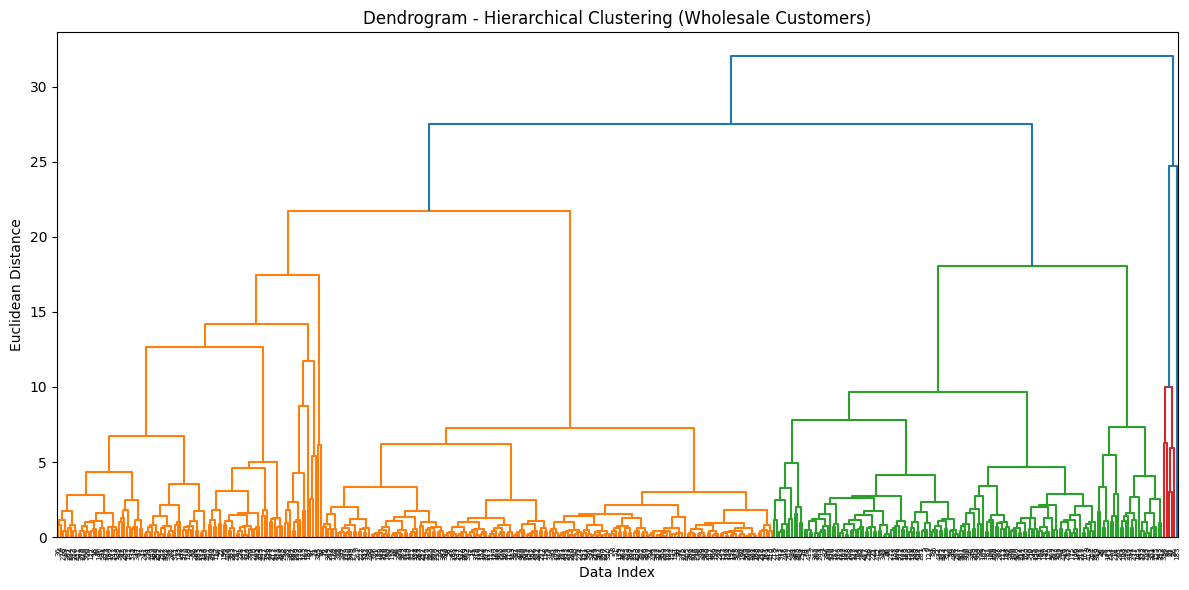

In [10]:
# Visualisasi dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - Hierarchical Clustering (Wholesale Customers)')
plt.xlabel('Data Index')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

In [11]:
from scipy.cluster.hierarchy import fcluster

# Potong menjadi 3 cluster
n_clusters = 3
labels = fcluster(linked, n_clusters, criterion='maxclust')

# Tambahkan ke DataFrame
df['Cluster'] = labels

In [12]:
from sklearn.metrics import silhouette_score

# Evaluasi dengan silhouette score
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.265


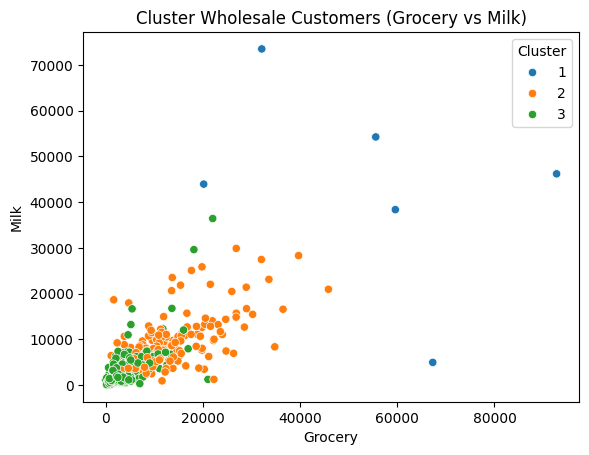

In [13]:
# Visualisasi hasil clustering pada 2D (misal Grocery vs Milk)
sns.scatterplot(data=df, x='Grocery', y='Milk', hue='Cluster', palette='tab10')
plt.title('Cluster Wholesale Customers (Grocery vs Milk)')
plt.show()

In [14]:
from sklearn.cluster import KMeans
#Gunakan data numerik yang sudah distandardisasi (X_scaled)
#Tentukan jumlah cluster, misalnya 3 (seperti pada hierarchical)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [15]:
#Tambahkan hasil cluster ke DataFrame
df['KMeans_Cluster'] = kmeans.labels_

In [16]:
#Evaluasi dengan Silhouette Score
kmeans_sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score (K-Means): {kmeans_sil_score:.3f}")

Silhouette Score (K-Means): 0.548


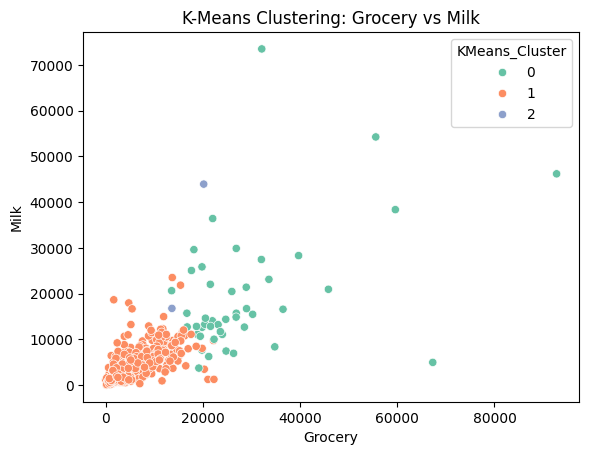

In [17]:
sns.scatterplot(data=df, x='Grocery', y='Milk', hue='KMeans_Cluster', palette='Set2')
plt.title('K-Means Clustering: Grocery vs Milk')
plt.show()

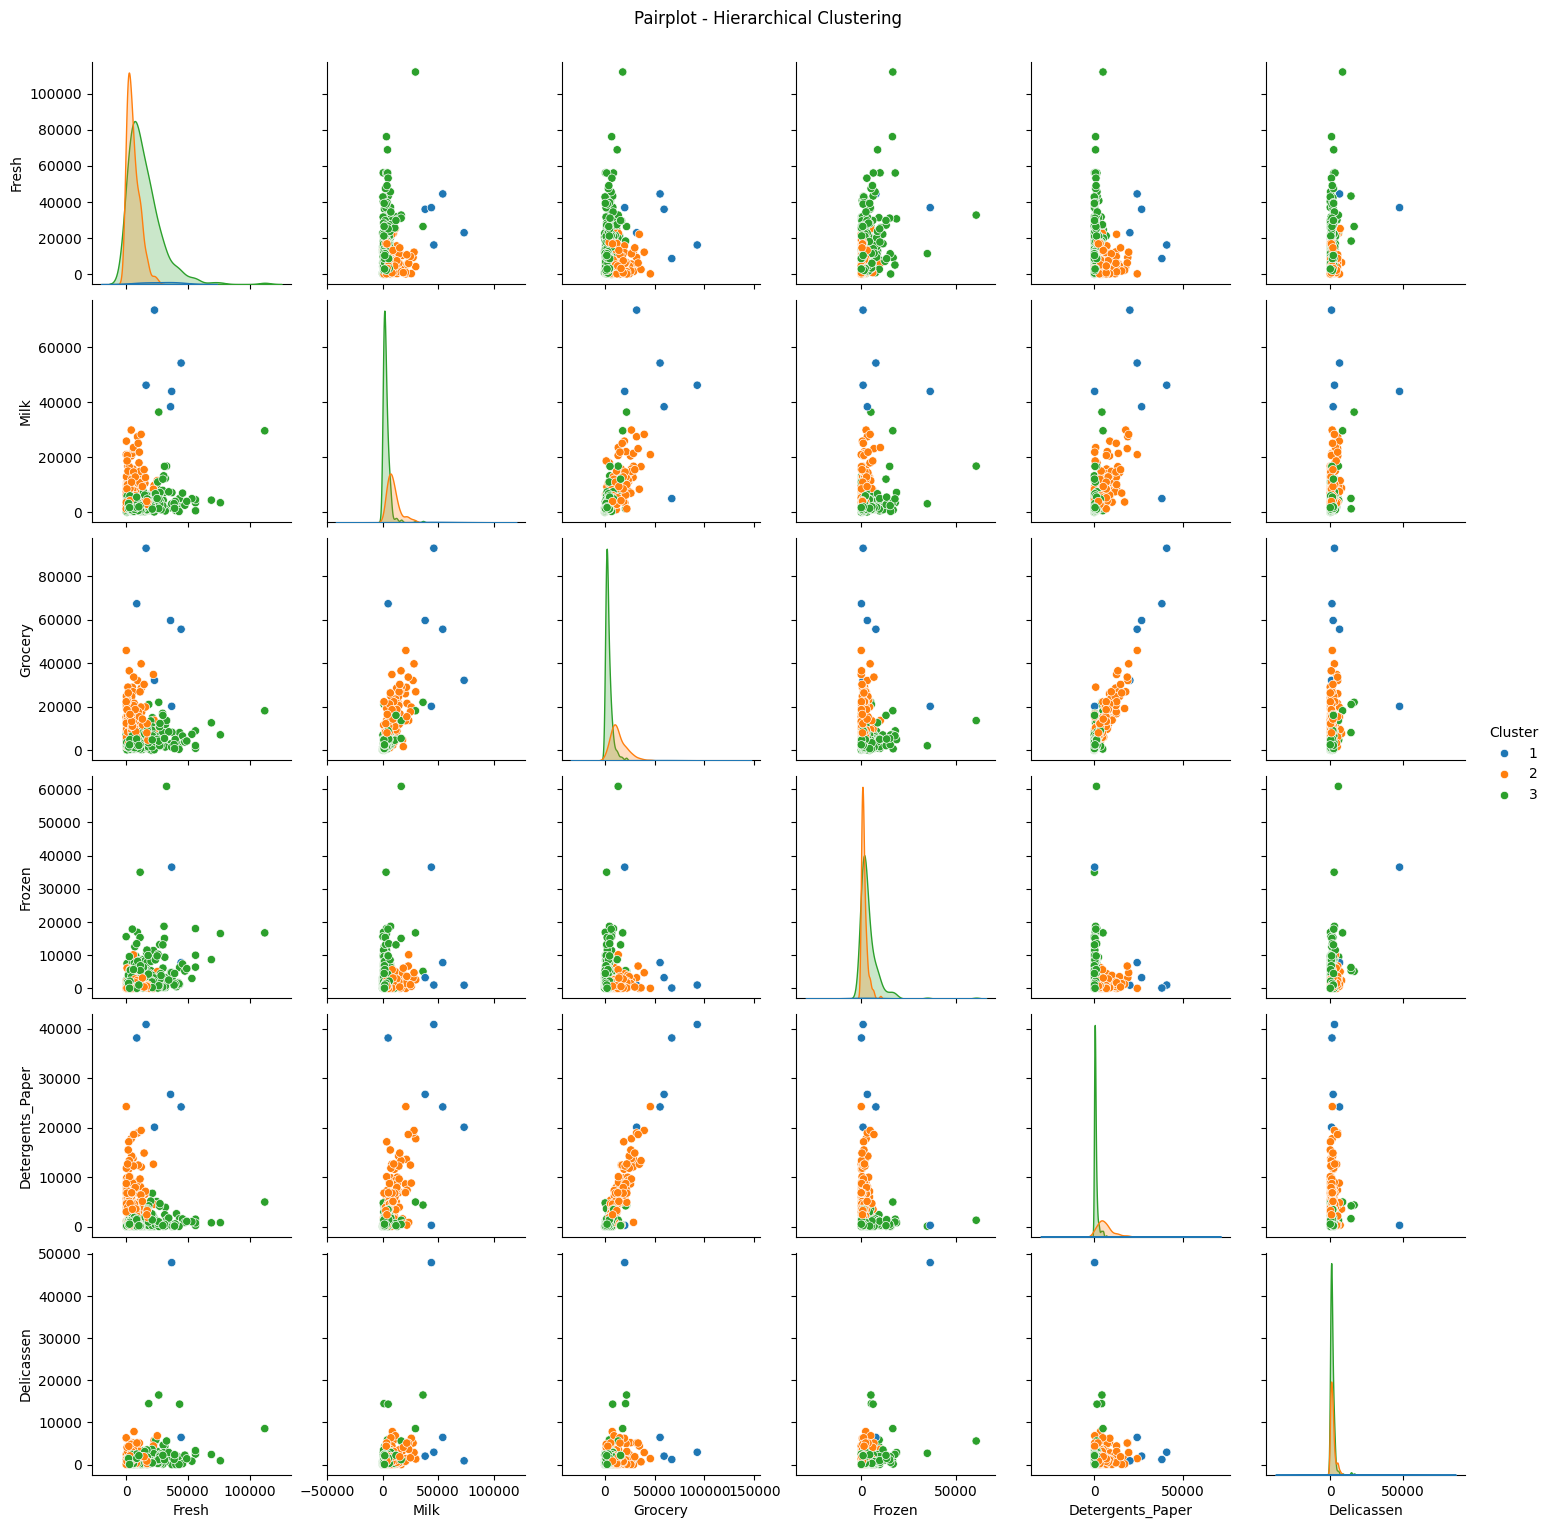

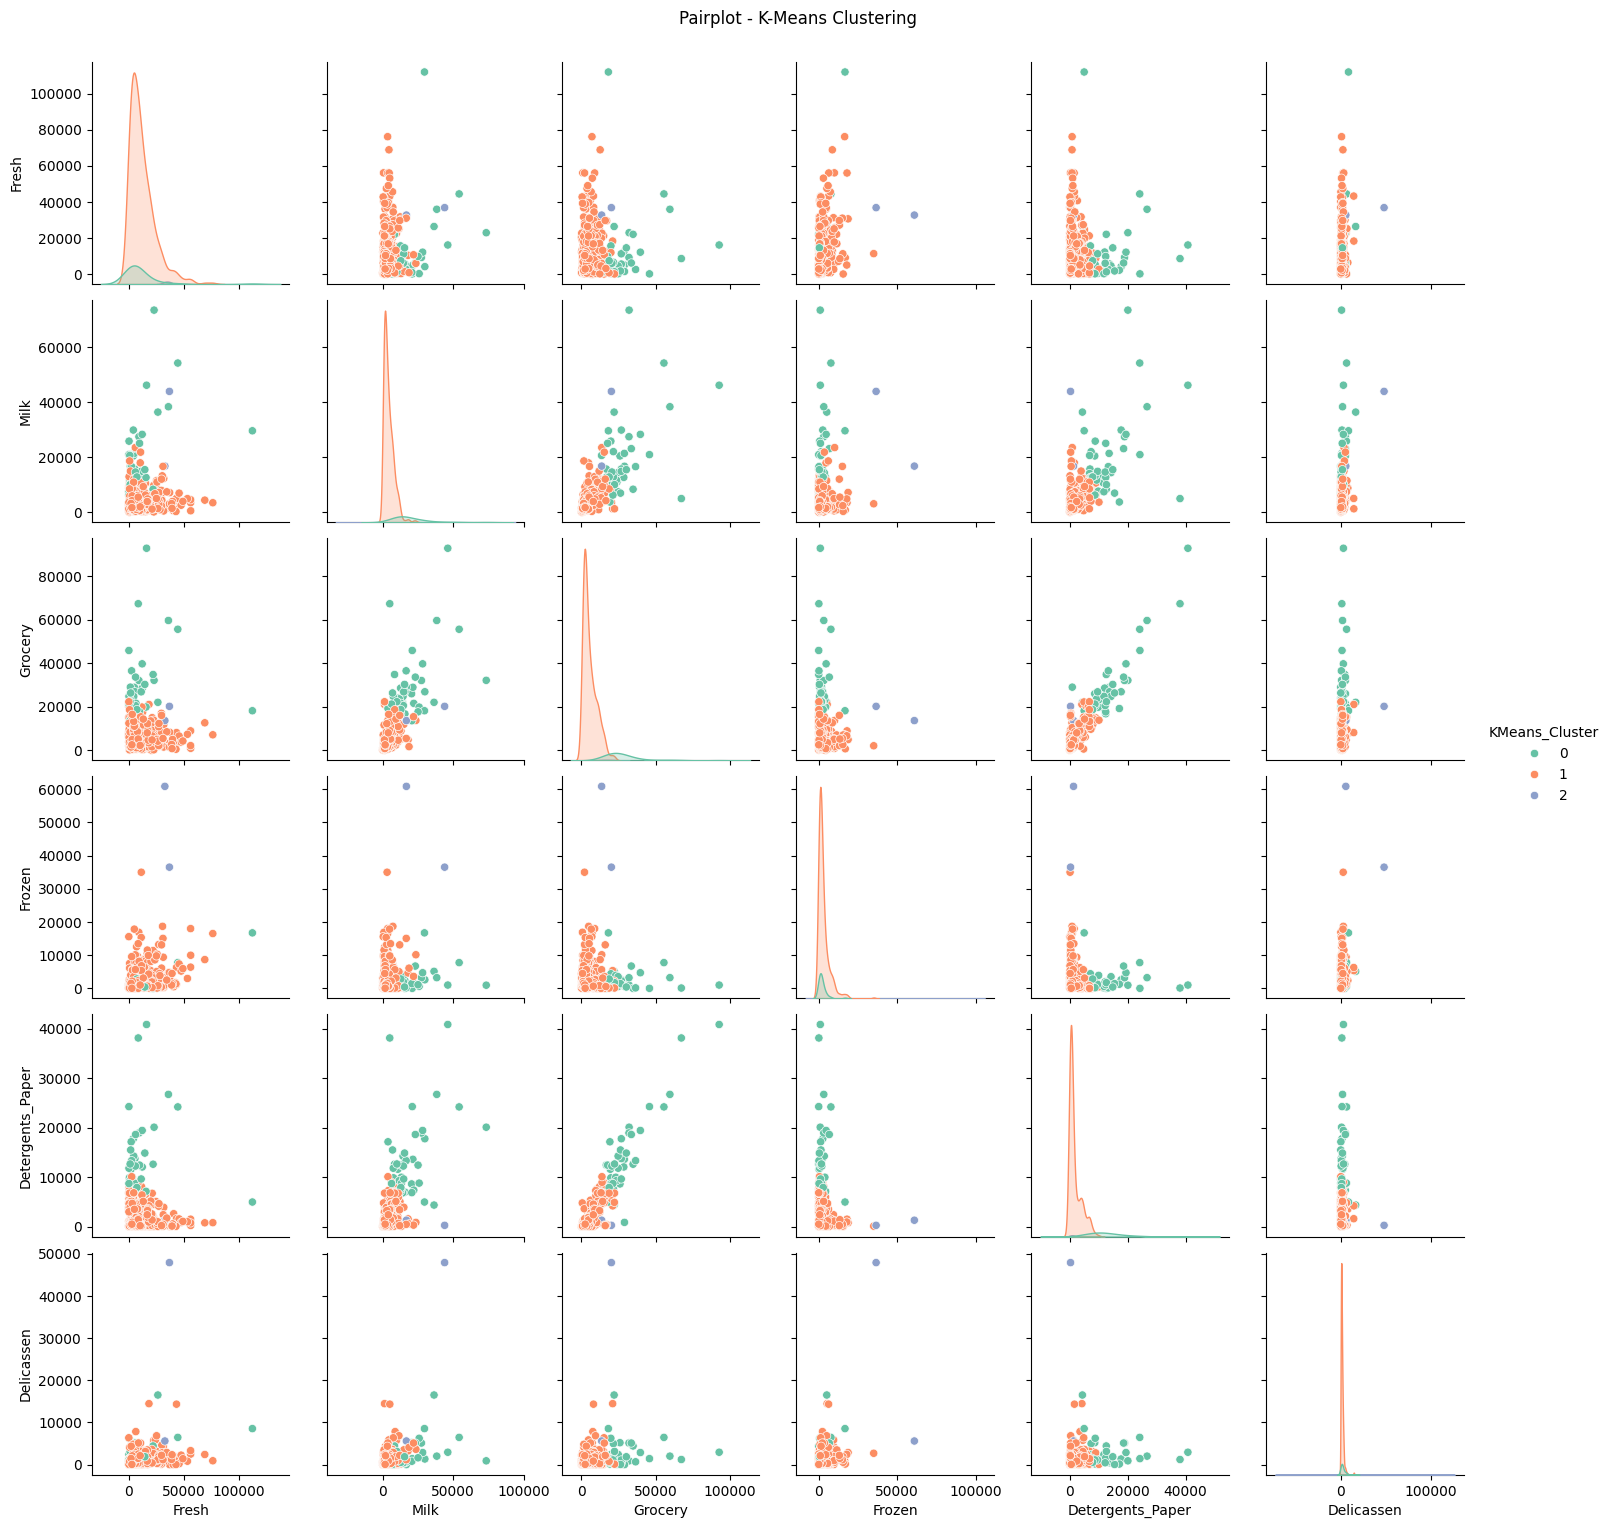

In [18]:
import seaborn as sns

# Untuk visualisasi semua fitur + hasil Hierarchical Clustering
sns.pairplot(df, vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'],
             hue='Cluster', palette='tab10')
plt.suptitle('Pairplot - Hierarchical Clustering', y=1.02)
plt.show()

# Untuk visualisasi semua fitur + hasil K-Means Clustering
sns.pairplot(df, vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'],
             hue='KMeans_Cluster', palette='Set2')
plt.suptitle('Pairplot - K-Means Clustering', y=1.02)
plt.show()


In [19]:
# Tabel perbandingan jumlah anggota tiap cluster
print("Distribusi Cluster (Hierarchical):")
print(df['Cluster'].value_counts().sort_index())

print("\nDistribusi Cluster (K-Means):")
print(df['KMeans_Cluster'].value_counts().sort_index())


Distribusi Cluster (Hierarchical):
Cluster
1      6
2    153
3    281
Name: count, dtype: int64

Distribusi Cluster (K-Means):
KMeans_Cluster
0     45
1    393
2      2
Name: count, dtype: int64


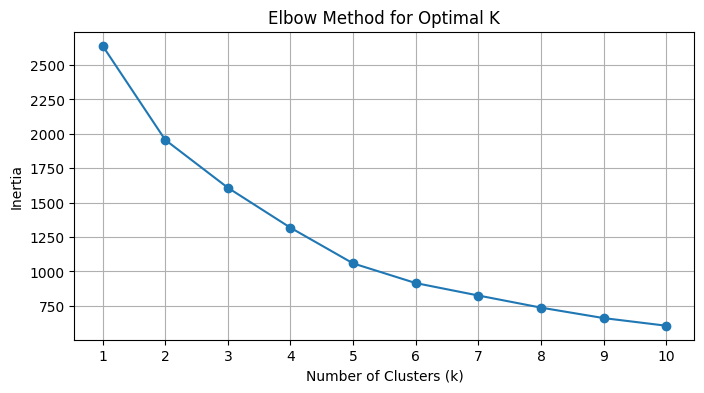

In [20]:
from sklearn.cluster import KMeans

inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()
